# Challenge: Model Comparison
<div style="text-align: right"> AE Simpson </div>

### Find a data set and build a KNN Regression and an OLS regression. Compare the two. How similar are they? Do they miss in different ways? 
### At the end write a few paragraphs to describe the models' behaviors and why you favor one model or the other. Try to determine whether there is a situation where you would change your mind, or whether one is unambiguously better than the other. Lastly, try to note what it is about the data that causes the better model to outperform the weaker model. 

In [1]:
#### Imports #######

#Basic
import pandas as pd
import numpy as np
import scipy

#Models
from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import neighbors
from sklearn.model_selection import cross_val_score

#Select K Best for feature Engineering
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

#Split the data
from sklearn.model_selection import train_test_split

#Plot data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

In [2]:
# --- Import and Read Data ---
data = pd.read_csv('auto-mpg.csv')
data.head(1)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu


In [3]:
print(data.shape)
print(data.dtypes)
data.describe()

(398, 9)
mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object


,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [4]:
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')

In [5]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [6]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [7]:
data.dropna(inplace=True)

In [8]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


The target data is MPG. Do any of the other features (not including the name) have a direct effect on miles per gallon?

### Feature Engineering

In [ ]:
features = 

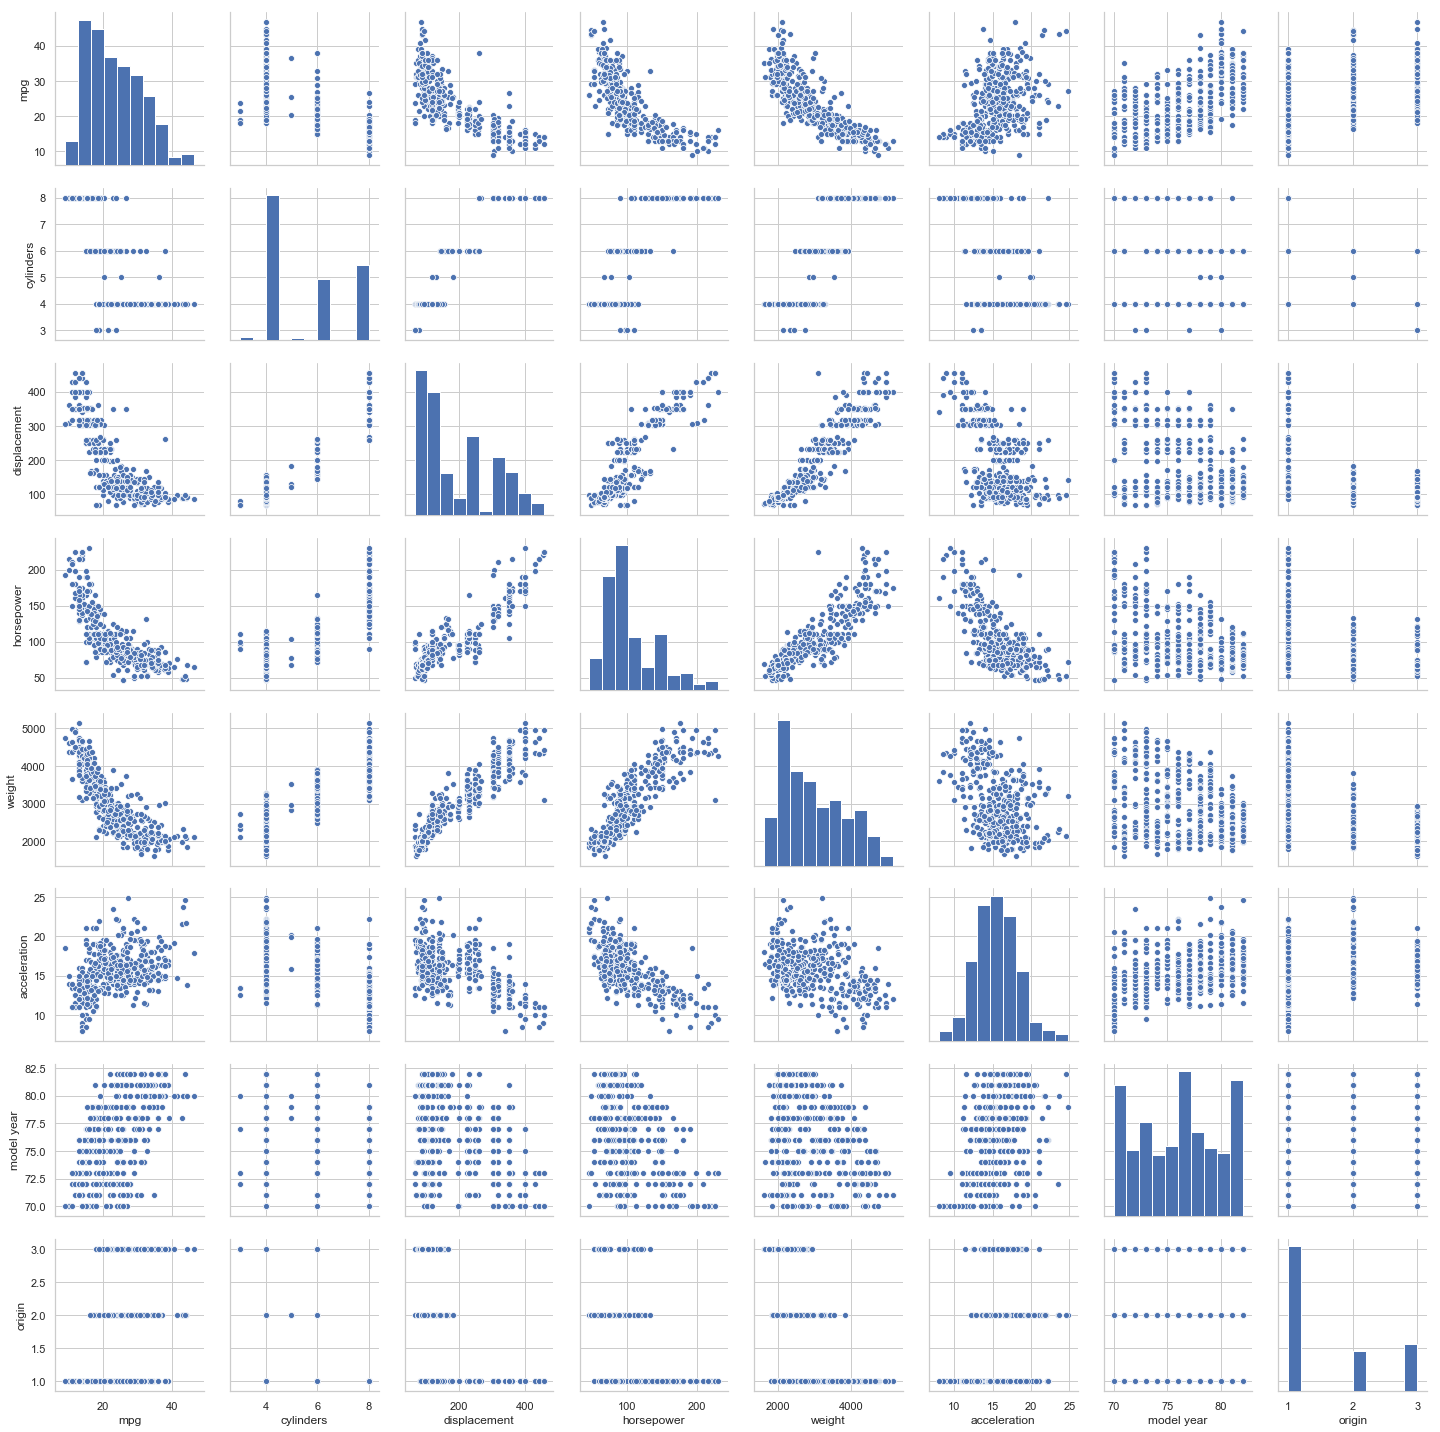

In [10]:
sns.pairplot(data)

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
model year    0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration  model year    origin  
mpg               0.423329    0.580541  0.565209  
cylinders        -0.504683   -0.345647 -0.568932  
displacement     -0.543800   -0.369855 -0.614535  
horsepower       -0.689196   -0.416361 -0.455171  
weight           -0.416839   -0.309120 -0.585005  
acceleration      1.000000    0.2903

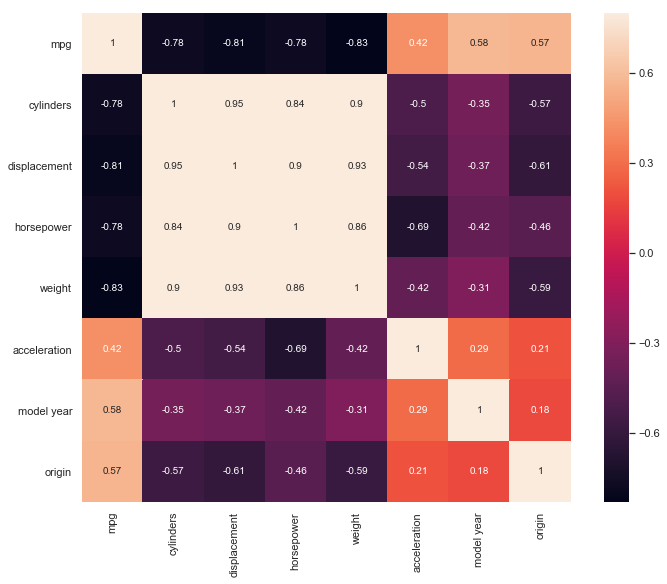

In [13]:
# Make the correlation matrix.
corrmat = data.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, annot=True, vmax=.8, square=True)
plt.show()

In [20]:
# Create a dataframe for the features
features = pd.DataFrame()

# Add Continuous variables
features['disp'] = data['displacement']
features['hp'] = data['horsepower']
features['weight'] = data['weight']
features['accel'] = data['acceleration']

# Create an outcome/target variable
target = data['mpg']

In [54]:
# Feature selection with k best
selector = SelectKBest(f_regression, k=3)
selector.fit(features,target)

idxs_selected = selector.get_support(indices=True)
features[features.columns[idxs_selected]].head(1)

,disp,hp,weight
0,307.0,130.0,3504


Of the four features, the best to use is weight.

In [27]:
#Create Features variables
displacement = features['disp']
hp = features['hp']
weight = features['weight']
acceleration = features['accel']

In [29]:
#Stats Models
x = np.column_stack((displacement, hp, weight, acceleration))
x = sm.add_constant(x, prepend=True)

results = smf.OLS(target,x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     233.4
Date:                Sat, 05 Jan 2019   Prob (F-statistic):          9.63e-102
Time:                        16:32:23   Log-Likelihood:                -1120.6
No. Observations:                 392   AIC:                             2251.
Df Residuals:                     387   BIC:                             2271.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.2511      2.456     18.424      0.0

#### Split the data to test and validate

In [32]:
#Split the data
feat_train, feat_test, target_train, target_test = train_test_split(features, target, test_size=0.30)

### OLS Regression

In [33]:
from sklearn.grid_search import GridSearchCV

# Instantiate and fit our model.
regr = linear_model.LinearRegression()

parameters = {'normalize':[True,False]}

#Note for regression problems have to do different scoreing methods:
grid = GridSearchCV(regr, parameters, scoring='r2', cv=5, verbose=0)


#Fit the Data
grid.fit(feat_train, target_train)

/Users/research/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/research/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'normalize': [True, False]}, pre_dispatch='2*n_jobs',
       refit=True, scoring='r2', verbose=0)

In [34]:
print(grid.best_score_)
print(grid.best_params_)

0.7026729105065445
{'normalize': False}


In [56]:
# Use the top 3 features and run model again

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['mpg'].values.reshape(-1, 1)
linear_formula = 'Y ~ displacement+hp+weight'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=data).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     451.6
Date:                Sat, 05 Jan 2019   Prob (F-statistic):          3.89e-102
Time:                        16:57:03   Log-Likelihood:                -1125.9
No. Observations:                 392   AIC:                             2258.
Df Residuals:                     389   BIC:                             2270.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       43.7776      1.163     37.639      0.000      41.491      46.064
displacement    -0.0165      0.006     -2.861      0.004      -0.028      -0.005
weight          -0.0058      0.001     -8.097      0.000      -0.007      -0.004
==============================================================================
Omnibus:                       45.647   Durbin-Watson:                   0.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.555
Skew:                           0.764   Prob(JB):                     1.30e-15
Kurtosis:                       4.365   Cond. No.                     1.66e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

I've tried using only the two best features, but it performed worse. Using the three best features improved it slightly.

### KNN

In [49]:
# Feature Engineering
    # use the same feature, and target variables

#Create validation holdout
kfeat_train, kfeat_test, ktarget_train, ktarget_test = train_test_split(features, target, test_size=0.30)

from scipy import stats
#Normalize Features
X = pd.DataFrame({
    'displacement': stats.zscore(kfeat_train['disp']),
    'hp': stats.zscore(kfeat_train['hp']),
    'weight': stats.zscore(kfeat_train['weight']),
    'acceleration': stats.zscore(kfeat_train['accel'])
})

In [50]:
#Call KNN
knn = neighbors.KNeighborsRegressor()

parameters = {
    'n_neighbors':[3,5,10,15,30,65],
    'weights':['uniform','distance']    
}

grid = GridSearchCV(knn, parameters, scoring='r2', cv=5, verbose=0)
#Fit the Data
grid.fit(X, ktarget_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [3, 5, 10, 15, 30, 65], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, scoring='r2', verbose=0)

In [51]:
print(grid.best_score_)
print(grid.best_params_)

0.7459967969184748
{'n_neighbors': 10, 'weights': 'distance'}


In [60]:
# This time I'll weight and use the raw data instead of z-scores
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance', algorithm='ball_tree')
# Our input data frame will be the z-scores this time instead of raw data.
X = pd.DataFrame({
    'displacement': stats.zscore(kfeat_train['disp']),
    'hp': stats.zscore(kfeat_train['hp']),
    'weight': stats.zscore(kfeat_train['weight']),
    'acceleration': stats.zscore(kfeat_train['accel'])
})
knn_w.fit(X, ktarget_train)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='distance')

In [61]:
score_w = cross_val_score(knn_w, X, ktarget_train, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Weighted Accuracy: 0.75 (+/- 0.10)


In [64]:
# This time I'll weight and use the raw data instead of z-scores
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance', algorithm='ball_tree')
# Our input data frame will be the z-scores this time instead of raw data.
X2 = pd.DataFrame({
    'displacement': stats.zscore(kfeat_train['disp']),
    'hp': stats.zscore(kfeat_train['hp']),
    'weight': stats.zscore(kfeat_train['weight'])
})
knn_w.fit(X2, ktarget_train)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='distance')

In [66]:
score_w2 = cross_val_score(knn_w, X2, ktarget_train, cv=5)
print("Weighted Accuracy: %0.3f (+/- %0.3f)" % (score_w2.mean(), score_w2.std() * 2))

Weighted Accuracy: 0.772 (+/- 0.113)


I tried taking the the features raw, but that performed worse than takin ghte z scores.

### Summary

Both models are fairly similar with OLS getting to about 70.3% accuracy and KNN getting to about 77.3% accuracy.
I prefer the KNN model because when I after feature reduction and using only the top 3 features, only KNN performed better, while OLS dropped almost a whole percentage point. I think if I would have used a dataset with significantly more features, I would be able to see bigger differences after feature reduction. I know that KNN performed better than OLS because of the multicollineararity between features.